In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 

In [2]:
df = pd.read_csv('data/3_clean_zomato_gof_500.csv')
df['rest_price_idr'] = df['rest_price_idr'] / 1000
df['rest_price_idr'] = df['rest_price_idr'].astype(int)
# df['rank_res_type'] = df['rank_res_type'].astype(int)
# df['rank_fac'] = df['rank_fac'].astype(int)

In [3]:
df.isnull().sum()

index                      0
url                        0
rest_price_idr             0
review                     0
lat                        0
long                       0
is_chain                   0
rating                     0
new_code_res_type          0
rank_res_type              0
new_code_fac               0
rank_fac                   0
geohash                    0
d_500_index                0
d_500_airport              0
d_500_atm                  0
d_500_bank                 0
d_500_cafe                 0
d_500_convenience_store    0
d_500_gas_station          0
d_500_hospital             0
d_500_lodging              0
d_500_meal_takeaway        0
d_500_mosque               0
d_500_park                 0
d_500_restaurant           0
d_500_school               0
d_500_store                0
d_500_supermarket          0
d_500_train_station        0
dtype: int64

In [4]:
df.head()

,index,url,rest_price_idr,review,lat,long,is_chain,rating,new_code_res_type,rank_res_type,...,d_500_hospital,d_500_lodging,d_500_meal_takeaway,d_500_mosque,d_500_park,d_500_restaurant,d_500_school,d_500_store,d_500_supermarket,d_500_train_station
0,0,https://www.zomato.com/jakarta/wakacao-1-kelap...,150,56.0,-6.167531,106.901752,0,3.8,4,0,...,6.0,6.0,2.0,0.0,2.0,40.0,10.0,22.0,6.0,0.0
1,1,https://www.zomato.com/jakarta/the-coffee-bean...,110,61.0,-6.157341,106.907888,1,3.0,0,91,...,2.0,20.0,14.0,4.0,2.0,82.0,12.0,48.0,20.0,0.0
2,2,https://www.zomato.com/jakarta/angke-kelapa-ga...,450,363.0,-6.152638,106.892576,0,4.5,2,2,...,11.0,15.0,6.0,2.0,1.0,32.0,13.0,19.0,10.0,0.0
3,3,https://www.zomato.com/jakarta/ikan-nila-pak-u...,100,113.0,-6.163588,106.903689,0,3.9,0,20,...,0.0,5.0,2.0,0.0,6.0,8.0,7.0,12.0,4.0,0.0
4,4,https://www.zomato.com/jakarta/hong-kong-sheng...,220,257.0,-6.157255,106.908430,1,4.1,0,275,...,3.0,13.0,5.0,0.0,2.0,14.0,7.0,18.0,11.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5803 entries, 0 to 5802
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    5803 non-null   int64  
 1   url                      5803 non-null   object 
 2   rest_price_idr           5803 non-null   int32  
 3   review                   5803 non-null   float64
 4   lat                      5803 non-null   float64
 5   long                     5803 non-null   float64
 6   is_chain                 5803 non-null   int64  
 7   rating                   5803 non-null   float64
 8   new_code_res_type        5803 non-null   int64  
 9   rank_res_type            5803 non-null   int64  
 10  new_code_fac             5803 non-null   int64  
 11  rank_fac                 5803 non-null   int64  
 12  geohash                  5803 non-null   object 
 13  d_500_index              5803 non-null   float64
 14  d_500_airport           

In [6]:
df.isnull().sum()

index                      0
url                        0
rest_price_idr             0
review                     0
lat                        0
long                       0
is_chain                   0
rating                     0
new_code_res_type          0
rank_res_type              0
new_code_fac               0
rank_fac                   0
geohash                    0
d_500_index                0
d_500_airport              0
d_500_atm                  0
d_500_bank                 0
d_500_cafe                 0
d_500_convenience_store    0
d_500_gas_station          0
d_500_hospital             0
d_500_lodging              0
d_500_meal_takeaway        0
d_500_mosque               0
d_500_park                 0
d_500_restaurant           0
d_500_school               0
d_500_store                0
d_500_supermarket          0
d_500_train_station        0
dtype: int64

In [7]:
# scaler = MinMaxScaler()
# Y = scaler.fit_transform(df[['rating']])
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review','new_code_res_type','new_code_fac'],axis=1), Y, test_size=0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review'],axis=1), Y, test_size=0.3, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash'],axis=1), df['rating'], test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review'],axis=1), df['rating'], test_size=0.3, random_state=42)

In [8]:
X_train.head()

,rest_price_idr,is_chain,rank_res_type,rank_fac,d_500_index,d_500_airport,d_500_atm,d_500_bank,d_500_cafe,d_500_convenience_store,...,d_500_hospital,d_500_lodging,d_500_meal_takeaway,d_500_mosque,d_500_park,d_500_restaurant,d_500_school,d_500_store,d_500_supermarket,d_500_train_station
3071,90,1,139,25,3668.0,0.0,13.0,30.0,20.0,10.0,...,2.0,2.0,6.0,16.0,0.0,13.0,4.0,3.0,6.0,0.0
2860,100,0,177,439,3408.0,0.0,1.0,2.0,8.0,5.0,...,0.0,2.0,0.0,8.0,2.0,4.0,2.0,6.0,1.0,0.0
4694,100,0,26,19,5806.0,0.0,5.0,1.0,7.0,4.0,...,2.0,4.0,6.0,7.0,0.0,12.0,0.0,11.0,4.0,0.0
5696,100,1,7,4,7144.0,0.0,21.0,11.0,4.0,4.0,...,1.0,7.0,1.0,6.0,0.0,10.0,6.0,11.0,6.0,0.0
3107,70,0,4,38,3710.0,0.0,6.0,10.0,0.0,0.0,...,0.0,3.0,0.0,6.0,3.0,0.0,3.0,9.0,3.0,6.0


In [9]:
regr = RandomForestRegressor(random_state=0,n_estimators=30, max_depth = 10)
# regr = RandomForestClassifier()
regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=30, random_state=0)

In [10]:
y_result_test = regr.predict(X_test)
y_result_train = regr.predict(X_train)
print(' MAE {} '.format(mean_absolute_error(y_result_test,y_test)))
print(' MSE {} '.format(mean_squared_error(y_result_test,y_test)))
print(' R2 {} '.format(r2_score(y_train,y_result_train)))

 MAE 0.3502029936030512 
 MSE 0.2006952355125489 
 R2 0.5421205589644377 


In [11]:
# result_train = pd.DataFrame()
# result_train['score'] = y_result_train
# result_train['type'] = 'train'
# result_train['idx'] = result_train.shape[0]

result_test = pd.DataFrame()
result_test['score'] = y_result_test
result_test['type'] = 'test'
result_test['idx'] = np.arange(result_test.shape[0])

result_test2 = pd.DataFrame()
result_test2['score'] = np.squeeze(y_test)
# result_test2['score'] = y_test
result_test2['type'] = 'train'
result_test2['idx'] = np.arange(result_test2.shape[0])



df_result = pd.concat([result_test2,result_test])
# result = pd.DataFrame({'predict':y_result_test,'real':y_test})
# result['predict'] = y_result_test
# result['real'] = y_test

In [12]:
df_result

,score,type,idx
3739,3.300000,train,0
1103,3.400000,train,1
812,2.700000,train,2
1632,3.600000,train,3
1128,3.000000,train,4
...,...,...,...
1156,3.664734,test,1156
1157,3.876781,test,1157
1158,3.596725,test,1158
1159,3.725712,test,1159


<AxesSubplot:xlabel='idx', ylabel='score'>

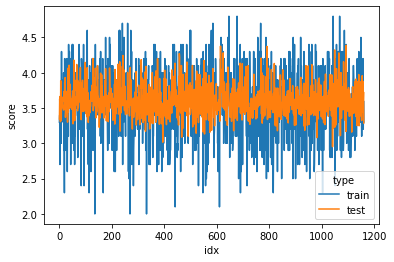

In [13]:
sns.lineplot(data=df_result, x="idx", y='score', hue="type")

In [35]:
# feature importance 
df_feat = pd.DataFrame({'score':regr.feature_importances_,'columns':X_train.columns})
df_feat.sort_values('score',ascending=False)


,score,columns
0,0.217782,rest_price_idr
4,0.167523,d_500_index
3,0.097964,rank_fac
2,0.077014,rank_res_type
6,0.045646,d_500_atm
8,0.036967,d_500_cafe
16,0.036192,d_500_restaurant
14,0.034030,d_500_mosque
7,0.033711,d_500_bank
18,0.031660,d_500_store
